In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
import pickle
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from sklearn import metrics

import gensim

In [2]:
model = models.load_model("models/model(0_93).h5")
labels = pd.read_csv("labels.txt", sep=",").columns

In [3]:
test_df = pd.read_csv("datasets/test.txt", sep=";")

In [4]:
test_df.head()

,mail,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [5]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [6]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [7]:
X_test = test_df['mail'].apply(preprocess)
y_test = test_df['emotion'].apply(lambda x: np.where(labels.values == x)[0][0])

In [8]:
X_test_doc = [text.split() for text in X_test]

In [9]:
X_test_final = pad_sequences(tokenizer.texts_to_sequences(X_test_doc), maxlen=200)

In [10]:
prediction = model.predict(X_test_final)

63/63 [==============================] - 4s 57ms/step


In [11]:
res = [arr.argmax() for arr in prediction]

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, res)

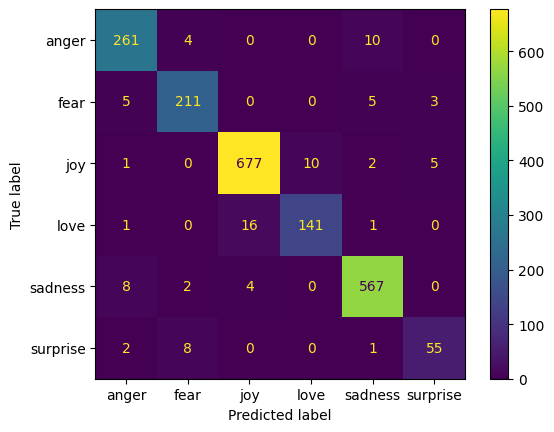

In [13]:
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)

cm.plot()

In [14]:
print("Accuracy: "+str((y_test == res).sum()/y_test.shape[0]*100)+"%")

Accuracy: 95.6%
